In [1]:
# [1] Import all necessary libraries:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn import metrics
# Note: Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm  

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
# [1a] Filter out any warning messages.
warnings.filterwarnings("ignore")

## 1. Import the data and explore

In [2]:
# [2] Read the provided CSV file/data set.
df = pd.read_csv("Customer_data.csv")  

# [3] Print a summary of the DataFrame to sense-check it.
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

## 2. Change categorical columns that have string values and convert to one word

In [9]:
#  check edu colum

df['Edu'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [16]:
# update the Edu column

df.loc[df['Edu'].str.contains('basic'),'Edu'] = 'pre-school'
df.loc[df['Edu'].str.contains('high'),'Edu'] = 'high-school'       
df.loc[df['Edu'].str.contains('university'),'Edu'] = 'uni'
df.loc[df['Edu'].str.contains('professional'),'Edu'] = 'professional'
df.loc[df['Edu'].str.contains('unknown'),'Edu'] = 'other'  
df.loc[df['Edu'].str.contains('illit'),'Edu'] = 'other'

df['Edu'].unique()

array(['pre-school', 'other', 'uni', 'high-school', 'professional'],
      dtype=object)

## 3. Create dummy variables for the categorical columns

In [12]:
df.columns

Index(['Age', 'Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Duration', 'Campaign', 'PosDays', 'Last_out', 'Var_rate',
       'Price_idx', 'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target'],
      dtype='object')

In [13]:
# Create dummy variables

features = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Last_out']

new_df = pd.get_dummies(df, columns = features)

## 4. Balance the data if its not balanced

In [61]:
df_final = new_df.fillna(0)

# [2] Select necessary columns: 
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_professional', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_final[nec_cols]
y = df_final['Target']

os = SMOTE(random_state=0)

X_test,X_train, y_test, y_train = train_test_split(X,y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(x_train, y_train)

os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data=os_data_y, columns = ['Target'])

print("length of oversampled data is ", len(os_data_X))

os_data_y

length of oversampled data is  21962


Target
0           0
1           0
2           0
3           0
4           0
...       ...
21957       1
21958       1
21959       1
21960       1
21961       1

[21962 rows x 1 columns]

In [62]:
os_data_y.value_counts()

Target
0         10981
1         10981
dtype: int64

## 5. Build and apply the decision tree model

<img width="578" alt="Screenshot 2022-06-02 at 12 18 58" src="https://user-images.githubusercontent.com/98043245/171618133-078560f6-9dbe-4d50-a2df-c9fe150af1f7.png">

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)

dtc = dtc.fit(os_data_X, os_data_y)

y_pred = dtc.predict(x_test)



## 6. Check the accuracy of the model


In [64]:
metrics.accuracy_score(y_test,y_pred)

0.6731989872012764

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     25567
           1       0.14      0.35      0.20      3264

    accuracy                           0.67     28831
   macro avg       0.52      0.53      0.50     28831
weighted avg       0.81      0.67      0.73     28831



In [66]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test,y_pred)


print(confusion_mat)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))


[[18258  7309]
 [ 2113  1151]]
Accuracy: 0.6731989872012764
Precision: 0.13605200945626478
Recall: 0.35263480392156865


## Findings

We can note the following from these results:

The accuracy of the model is 67%, indicating the model is somewhat accurate at correctly identifying relevant customers versus irrelevant customers. (Hint: Remember that you have to use the weighted average.)

A precision score of 13.6% is very low, which indicates that many of the selected customers did not, in fact, fit the required profile. (Hint: We have specified the customers that fit the profile as 1.)

The recall score of 35% is relatively low, indicating that the model is incorrectly classifying many positive cases (i.e. there were 2,420 false positives, to be precise). (Hint: We have specified the customers that fit the profile as 1.)



## 7. Visualise the decision tree

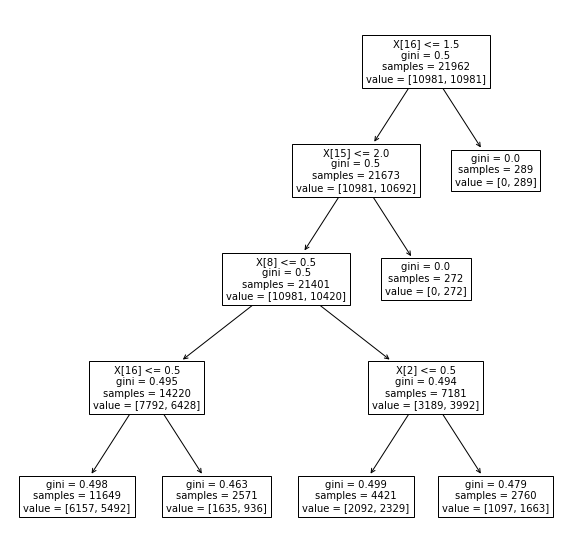

In [67]:
# [1] Import matplotlib to create a visualisation 
# and the ‘tree’ package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dtc, fontsize=10)

plt.show()


#### Playing around with the number of levels

You can change the number of levels of the decision tree to be displayed by adjusting the value of max_depth. Play around with this and change it to 3, 6, 10 or any number you prefer, indicating to Python how many levels to display. 

In [81]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
dtc = dtc.fit(os_data_X, os_data_y)
y_pred = dtc.predict(X_test)



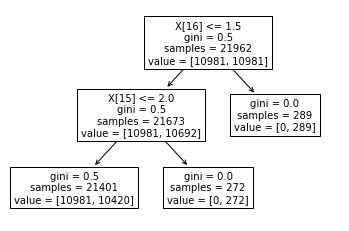

In [82]:
tree.plot_tree(dtc, fontsize=10)
plt.show()